In [40]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np


In [41]:
# source text
data = """ Jack and Jill went up the hill\n To fetch a pail of water\n Jack fell down and broke his crown\n
And Jill came tumbling after\n """

In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])


In [43]:
sequences = []
for line in data.split("\n"):
    encoded = tokenizer.texts_to_sequences([line])[0]

    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
print(f"Total Sequences: {len(sequences)}")



Total Sequences: 21


In [44]:
# pad the input sequences
max_length = max([len(seq) for seq in sequences])
sequnces = pad_sequences(sequences, maxlen=max_length, padding="pre")
print(f"Max Sequence Length: {max_length}")
sequnces = np.asarray(sequnces)

Max Sequence Length: 7


In [45]:
vocab_size = len(tokenizer.word_index) + 1
x, y = sequnces[:,:-1], sequnces[:,-1]
y = to_categorical(y, num_classes=vocab_size)



In [46]:
# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=10,
                        input_length=max_length-1))
    model.add(LSTM(50))
    model.add(Dense(vocab_size, activation="softmax"))

    # compile the network
    model.compile(loss="categorical_crossentropy", optimizer = "adam",
                  metrics=['accuracy'])
    model.summary()
    return model



In [47]:
model = define_model(vocab_size, max_length)
H = model.fit(x, y, epochs=500)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 6, 10)             220       
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_3 (Dense)              (None, 22)                1122      
Total params: 13,542
Trainable params: 13,542
Non-trainable params: 0
_________________________________________________________________
Train on 21 samples
Epoch 1/500
21/21 [==============================] - 3s 124ms/sample - loss: 3.0903 - accuracy: 0.0000e+00
Epoch 2/500
21/21 [==============================] - 0s 475us/sample - loss: 3.0888 - accuracy: 0.0476
Epoch 3/500
21/21 [==============================] - 0s 428us/sample - loss: 3.0872 - accuracy: 0.0952
Epoch 4/500
21/21 [============================

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
epoch_no=500

epochs = range(1,epoch_no+1)
loss = H.history['loss']
accuracy = H.history['accuracy']
plot_df = pd.DataFrame(data=np.c_[epochs,loss,accuracy],
                       columns=['epochs','loss', 'accuracy'])

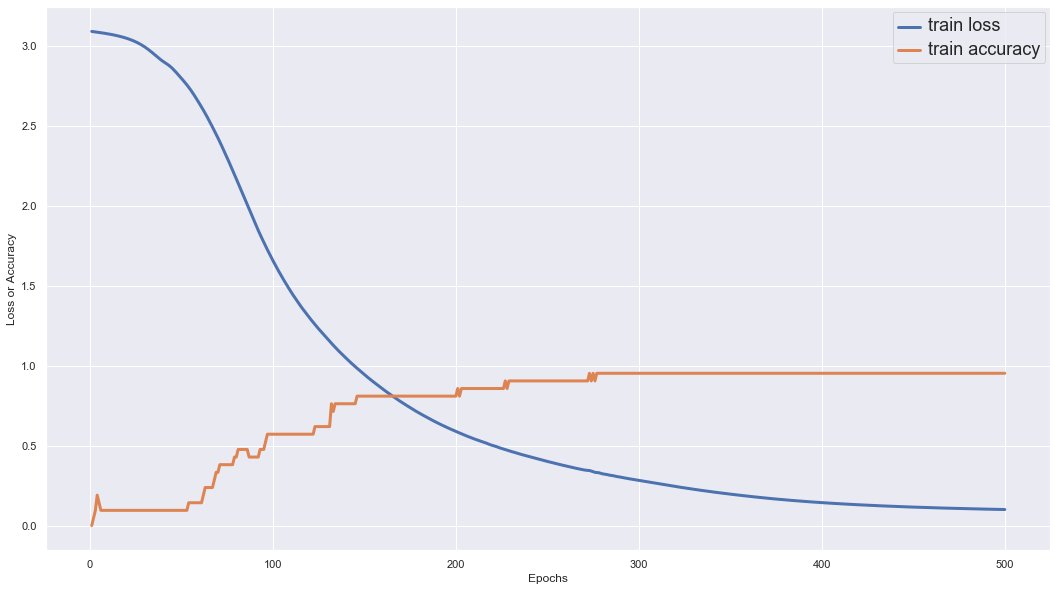

In [49]:
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(18,10))
sns.lineplot(data=plot_df, x='epochs', y='loss', ax=ax, label='train loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='accuracy', ax=ax, label='train accuracy', linewidth=3)
ax.set_ylabel('Loss or Accuracy')
ax.set_xlabel('Epochs')
plt.setp(ax.get_legend().get_texts(), fontsize='18'); # for legend text

In [50]:
tokenizer.word_index



{'and': 1,
 'jack': 2,
 'jill': 3,
 'went': 4,
 'up': 5,
 'the': 6,
 'hill': 7,
 'to': 8,
 'fetch': 9,
 'a': 10,
 'pail': 11,
 'of': 12,
 'water': 13,
 'fell': 14,
 'down': 15,
 'broke': 16,
 'his': 17,
 'crown': 18,
 'came': 19,
 'tumbling': 20,
 'after': 21}